# Bike-sharing-analysis
A data analysis project to explore bike sharing, and what factors impact bike sharing in Washington, D.C., USA, for the period between January 1, 2011, and December 31, 2012. 

Data source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset# 

In [26]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
# load data
hourly_data = pd.read_csv('data/hour.csv')

In [28]:
# head
hourly_data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [29]:
# generic statistics
print(f"shape of data is: {hourly_data.shape[0]} rows and {hourly_data.shape[1]} columns.")
print(f"Missing values in data: {hourly_data.isnull().sum().sum()}")

shape of data is: 17379 rows and 17 columns.
Missing values in data: 0


In [30]:
# stats on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


- `temporal features`: This contains information about the time at which the
record was registered. This group contains the dteday, season, yr, mnth, hr,
holiday, weekday, and workingday columns.
- `weather related features`: This contains information about the weather
conditions. The weathersit, temp, atemp, hum, and windspeed columns
are included in this group.
- `record related features`: This contains information about the number
of records for the specific hour and date. This group includes the casual,
registered, and cnt columns.

## Data Preprocessing
Goal: Encode the temporal features into more human readable form
- seasons from 1-4, to Winter, Spring, Summer & Fall seasons.
- yr from 0 & 1 to 2011 and 2012
- weekday from 0-6 to Sunday (0), Monday(1) throuhg Saturday(6)
- scale hum column to 0-100 as it represents percentages
- scale windspeed to values between 0 (min) and 67(max)

In [31]:
# copy of dataset
hourly_data_clean = hourly_data.copy()

In [32]:
# seasons mapping using dictionary, apply and lambda functions
seasons_map = {1: 'winter',
               2: 'spring',
               3: 'summer',
               4: 'fall'}
hourly_data_clean.season = hourly_data_clean['season'].apply(lambda x: seasons_map[x])

In [33]:
# transform yr column
yr_map = {0: 2011, 1: 2012}
hourly_data_clean.yr = hourly_data_clean['yr'].apply(lambda x: yr_map[x])

In [34]:
# transfrom weekdays
day_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hourly_data_clean.weekday = hourly_data_clean['weekday'].apply(lambda x: day_map[x])

Transforming weather related columns
weathersit column represents the current weather conditions, where
1 stands for clear weather with a few clouds, 2 represents cloudy weather,
3 relates to light snow or rain, and 4 stands for heavy snow or rain. The hum
column stands for the current normalized air humidity, with values from 0 to
1 (hence, we will multiply the values of this column by 100, in order to obtain
percentages). Finally, the windspeed column represents the windspeed, which
is again normalized to values between 0 and 67 m/s.

In [35]:
# transfrom weathersit
weather_map = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
hourly_data_clean.weathersit = hourly_data_clean['weathersit'].apply(lambda x: weather_map[x])

In [36]:
# rescale hum and windspeed columns
hourly_data_clean.hum = hourly_data_clean['hum']*100
hourly_data_clean.windspeed = hourly_data_clean['windspeed']*67

#### Test

In [37]:
# visualize the changes in the columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
hourly_data_clean[cols].sample(15, random_state=1083)

,season,yr,weekday,weathersit,hum,windspeed
10653,spring,2012,Sunday,cloudy,94.0,19.0012
13136,summer,2012,Friday,clear,27.0,7.0015
4916,summer,2011,Thursday,clear,56.0,15.0013
4329,summer,2011,Monday,clear,83.0,8.9981
15536,fall,2012,Sunday,clear,41.0,30.0026
3208,spring,2011,Wednesday,cloudy,78.0,19.0012
2278,spring,2011,Saturday,cloudy,82.0,8.9981
12721,spring,2012,Tuesday,cloudy,78.0,7.0015
12927,summer,2012,Wednesday,clear,31.0,12.9980
10464,winter,2012,Saturday,cloudy,88.0,0.0000


## Analysis

#### 1. Registered vs. casual use

In [38]:
# assert that total number of rides is == to sum of regitered and causal users/rides
assert (hourly_data_clean.casual + hourly_data_clean.registered == hourly_data_clean.cnt).all(),\
'Sum of casual & registered not equal to total number of rides'

/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


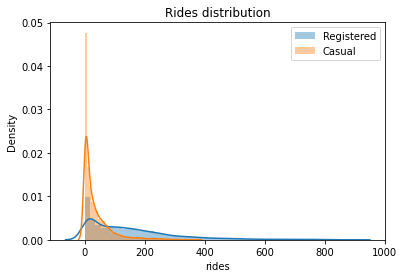

In [39]:
# ploting distribution of registered vs casual users/rides
sns.distplot(hourly_data_clean['registered'], label='Registered')
sns.distplot(hourly_data_clean['casual'], label = 'Casual')
plt.legend()
plt.xlabel('rides')
# plt.ylabel('frequncy')
plt.title('Rides distribution')
plt.savefig('figures/rides_distribution.png', format='png');

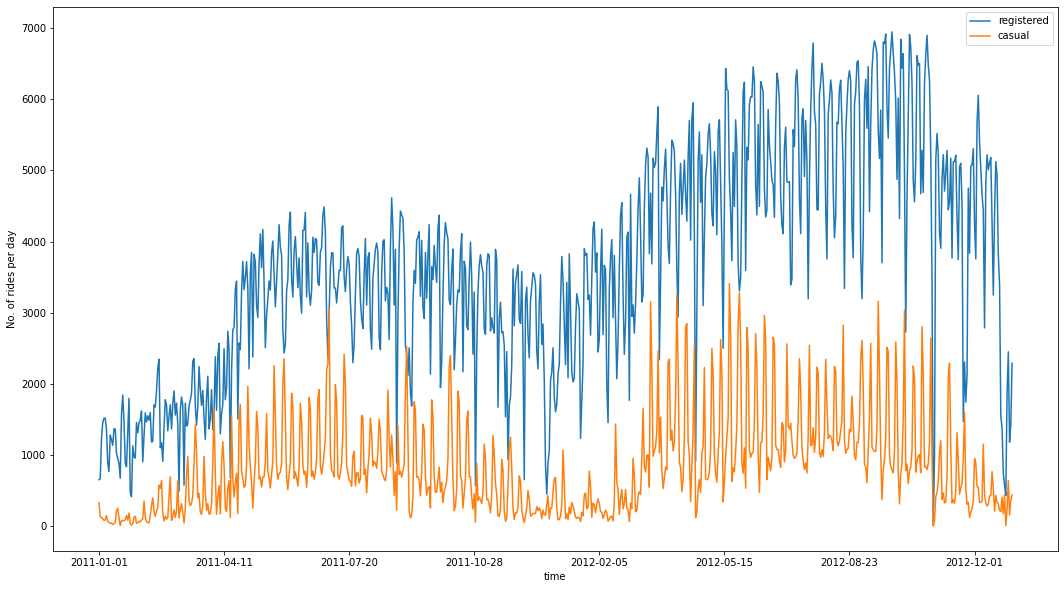

In [40]:
# evolution of rides over time
plot_data = hourly_data_clean[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(18,10))
ax.set_xlabel('time');
ax.set_ylabel('No. of rides per day');
plt.savefig('figures/rides_daily.png', format='png')

No. of registered rides is alwas higher than that of causl rides per day acording to the figure above. During winter, the total number of rides decrease. 

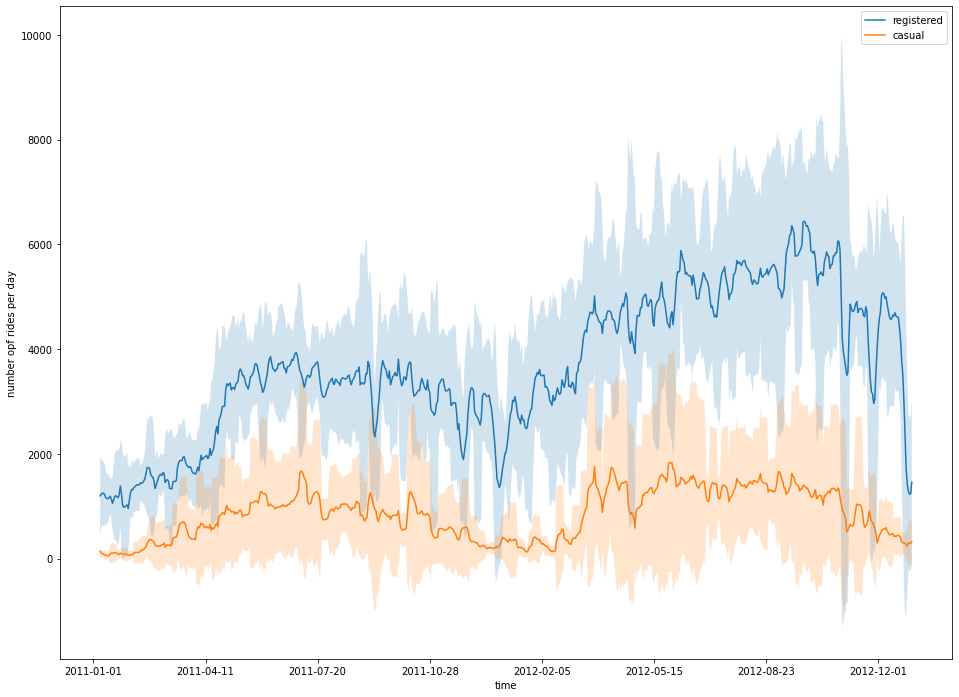

In [43]:
"""
    create new dataframe with necessary for platting columns and obtain number of rides per day, groupign each day.
"""
plot_data = hourly_data_clean[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

# rolling mean and standard deviation window definition
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()    

"""
    create a plot of series where we first plot the series of rollign eans then we color the zones between te series of rollign means +-2 rollign standard deviations
"""
ax = rolling_means.plot(figsize=(16,12))
ax.fill_between(rolling_means.index, rolling_means['registered']\
    + 2*rolling_deviations['registered'],\
        rolling_means['registered']\
            - 2*rolling_deviations['registered'],\
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual']\
    + 2*rolling_deviations['casual'],\
        rolling_means['casual']\
            - 2*rolling_deviations['casual'],\
                alpha = 0.2)
ax.set_xlabel('time');
ax.set_ylabel("number opf rides per day");
plt.savefig('figures/rides_aggregated.png', format='png')

The rolling mean and std is the mean or std  at a certain time intance computed in a given window entries either wekly or monthy and nt for entries of the whole series.

next we focus on distribution of requests over separate hours and days of the week.

/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


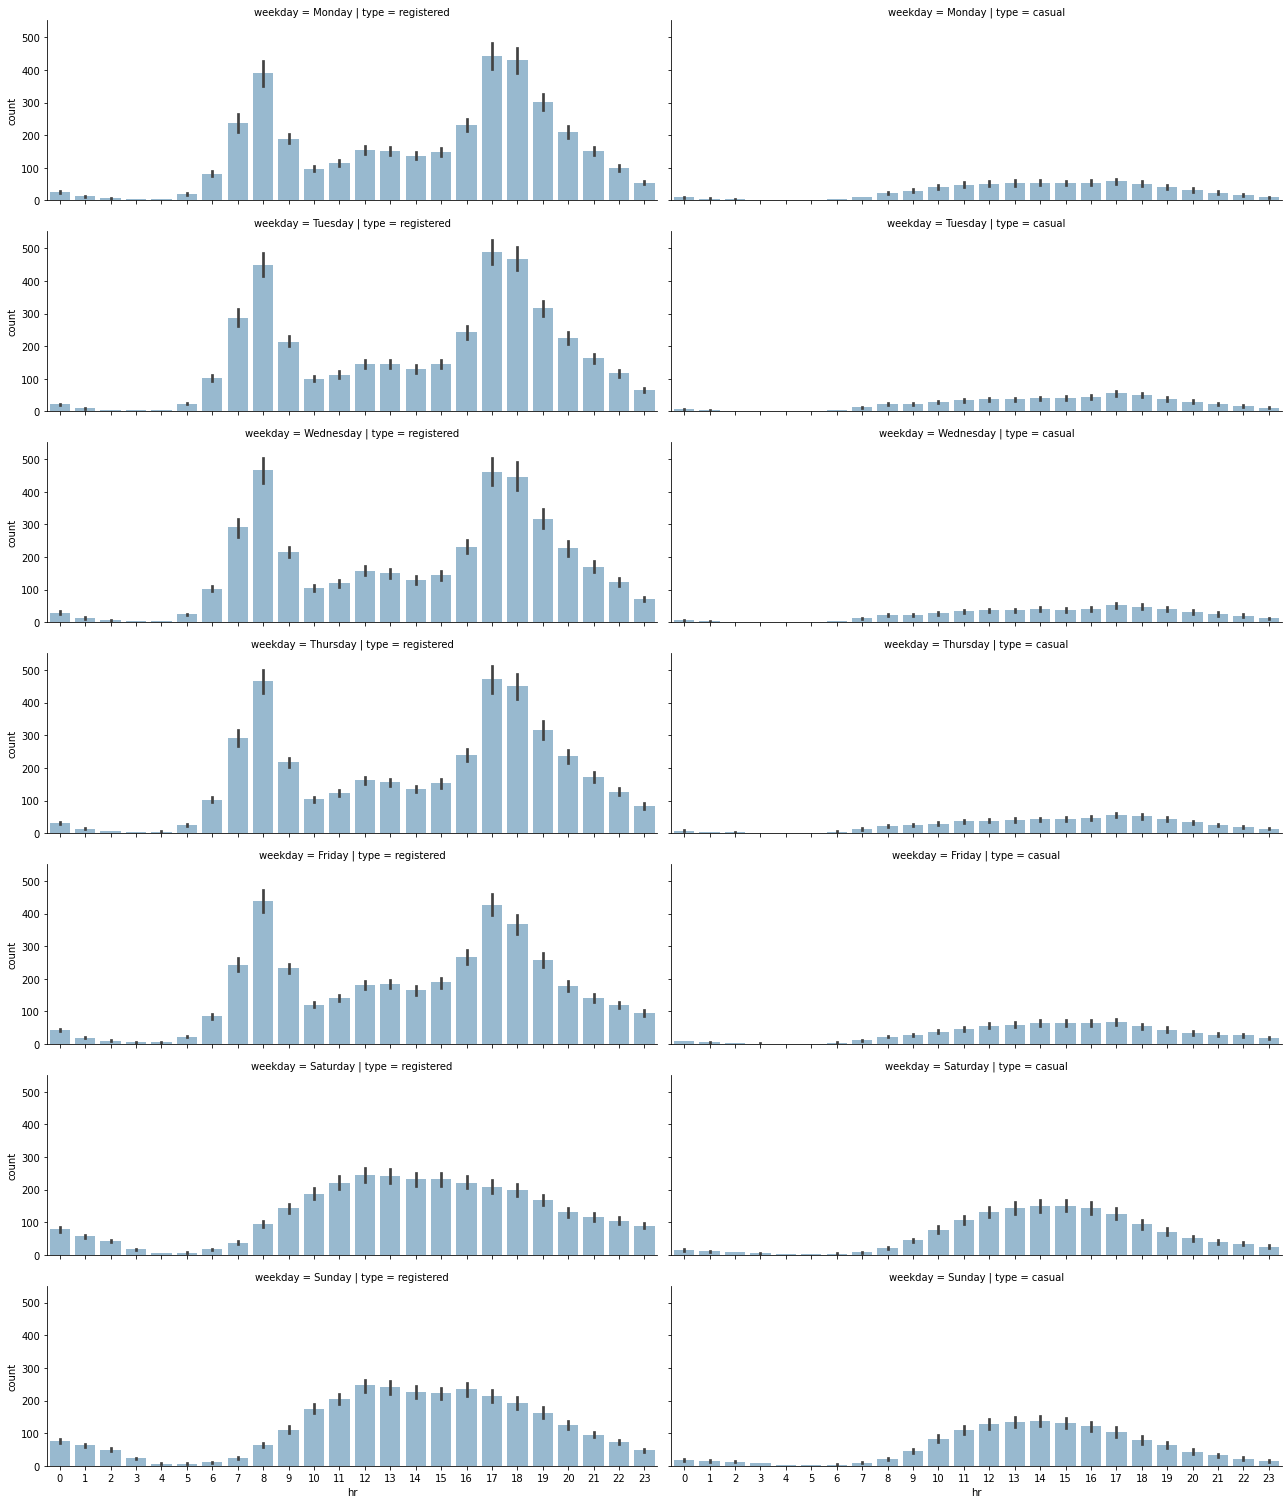

In [50]:
# columns needed
plot_data = hourly_data_clean[['hr', 'weekday', 'registered', 'casual']]

'''
transform the data into a format, in number of entries are computer as count, for each distinct hr,
weekday and type (registered or casual)
'''
plot_data = plot_data.melt(id_vars=['hr', 'weekday'],\
    var_name='type', value_name='count')

""" 
    create FaceGrid object, in which a grid plot is produced.
    as columns we have the various days of the weeks,
    as rows, the differnt types (registered adn casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', \
    col='type', height=3, aspect=3, \
        row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# populate the faceGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figures/weekday_hour_distributions.png', format='png')

##### conslusion: 
- most bike sharing service usage occurs durign workign days from 8am to 6pm.
- usage patterns for weekends for both registered and casual users is concentrated between 11am and 6 pm

#### 2. Seasonal impact on rides